In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import time

In [5]:
# Read in the data . parquet file
df = pd.read_parquet('daily_weather.parquet')
df.head()

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
0,41515,Asadabad,1957-07-01,Summer,27.0,21.1,35.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,41515,Asadabad,1957-07-02,Summer,22.8,18.9,32.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,41515,Asadabad,1957-07-03,Summer,24.3,16.7,35.6,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,41515,Asadabad,1957-07-04,Summer,26.6,16.1,37.8,4.1,NaN,NaN,NaN,NaN,NaN,NaN
4,41515,Asadabad,1957-07-05,Summer,30.8,20.0,41.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# drop avg_temp_c NA
df = df.dropna(subset=['max_temp_c'])
df = df.dropna(subset=['min_temp_c'])

In [7]:
df.shape

(20158600, 14)

### Benchmark Rendering Time
Create a scatter plot and benchmark the rendering time for varying input data sizes.

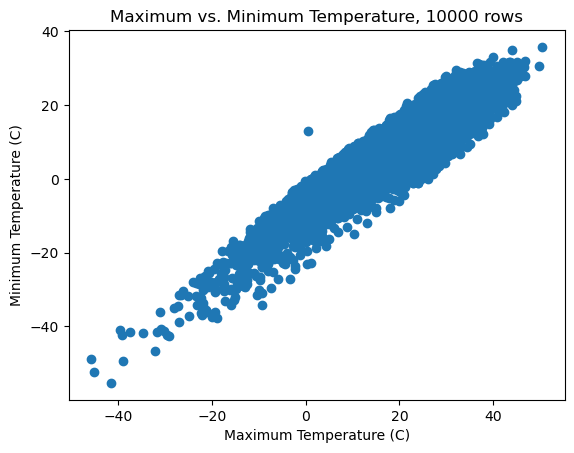

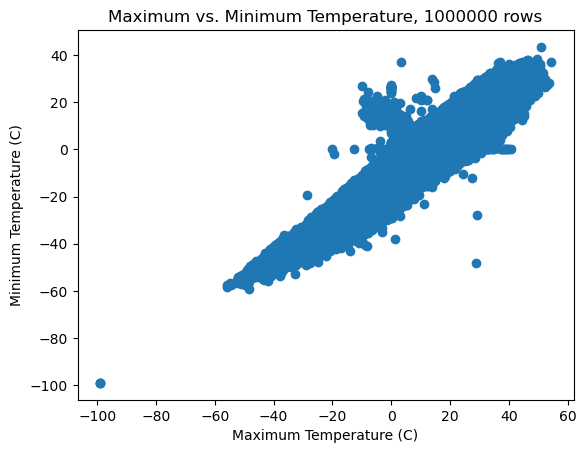

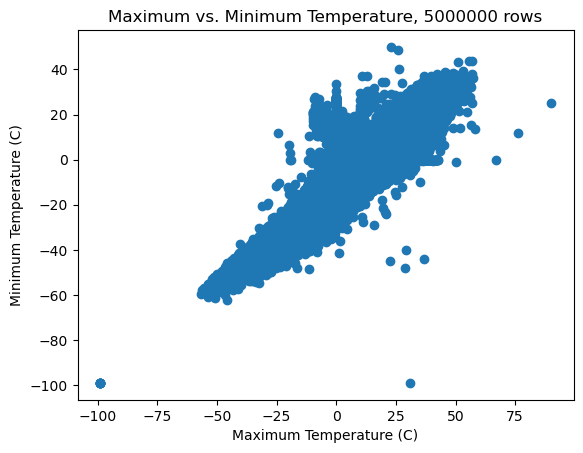

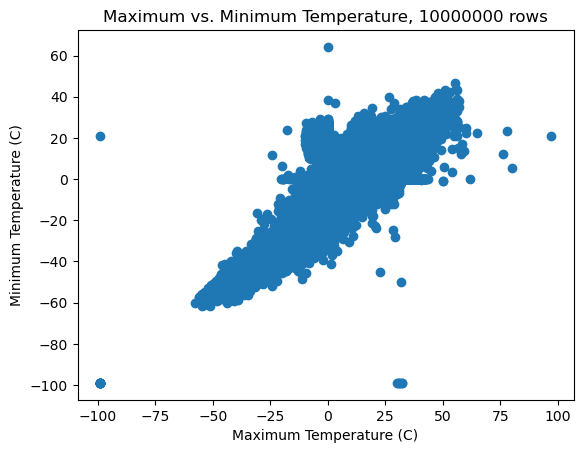

In [8]:
# Define data sizes to test
data_sizes = [10000, 1_000_000, 5_000_000, 10_000_000]

# Benchmark rendering time for a scatter plot
scatter_plot_times = []
for size in data_sizes:
    subset = df.sample(n=size)
    start_time = time.time()
    plt.scatter(subset['max_temp_c'], subset['min_temp_c'])
    plt.xlabel('Maximum Temperature (C)')
    plt.ylabel('Minimum Temperature (C)')
    plt.title('Maximum vs. Minimum Temperature, {} rows'.format(size))
    plt.show()
    end_time = time.time()
    scatter_plot_times.append(end_time - start_time)

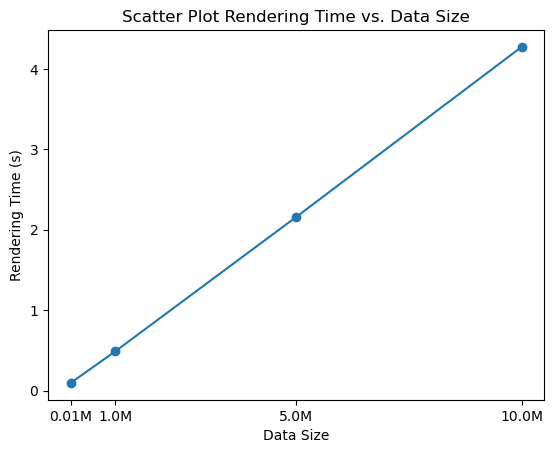

In [9]:
# plot the scatter_plot_times in a line chart
plt.plot(data_sizes, scatter_plot_times, marker='o')
plt.xlabel('Data Size')
plt.ylabel('Rendering Time (s)')
plt.title('Scatter Plot Rendering Time vs. Data Size')

# update x axis to be in millions
plt.xticks(data_sizes, [str(size/1_000_000) + 'M' for size in data_sizes])

plt.show()

## CPU & GPU

In [10]:
import numpy as np
import time
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [27]:
df_max = df['max_temp_c'].sample(n=10_000_000).reset_index(drop=True)
df_min = df['min_temp_c'].sample(n=10_000_000).reset_index(drop=True)

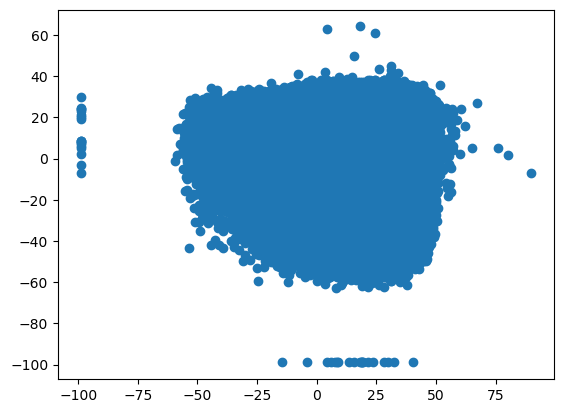

In [28]:
# Matplotlib plotting and timing
start_time_mpl = time.time()

plt.scatter(df_max, df_min)
plt.show()

end_time_mpl = time.time()

In [29]:
mpl_time = end_time_mpl - start_time_mpl
mpl_time

4.2705137729644775

In [30]:
# Plotly plotting and timing
start_time_plotly = time.time()

fig = px.scatter(x=df_max, y=df_min)
fig.show()

end_time_plotly = time.time()

In [31]:
plotly_time = end_time_plotly - start_time_plotly
plotly_time

6.376204967498779

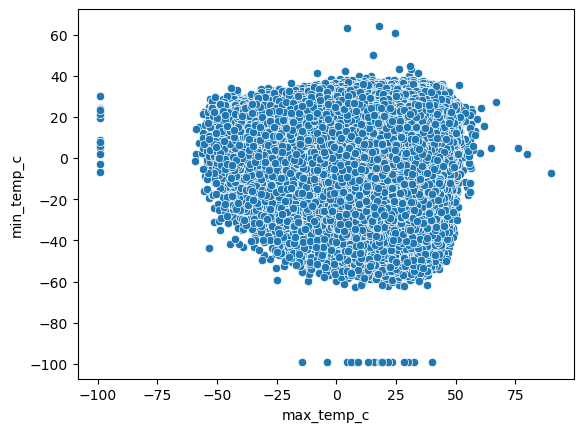

In [32]:
# seaborn plotting and timing
start_time_sns = time.time()

sns.scatterplot(x=df_max, y=df_min)
plt.show()

end_time_sns = time.time()

In [33]:
sns_time = end_time_sns - start_time_sns
sns_time

4.943759202957153

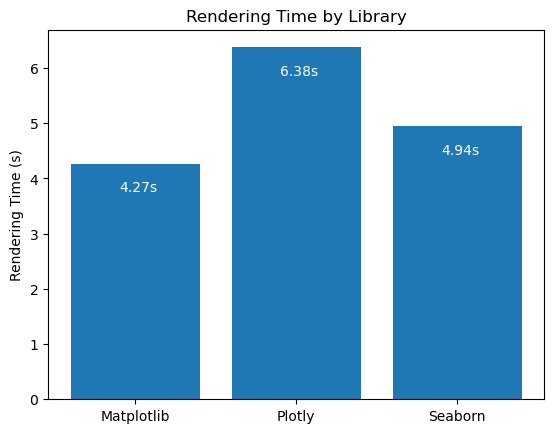

In [34]:
# plot the times in a bar chart
plt.bar(['Matplotlib', 'Plotly', 'Seaborn'], [mpl_time, plotly_time, sns_time])
plt.ylabel('Rendering Time (s)')
plt.title('Rendering Time by Library')

# add render times inside bar
plt.text(x=-0.1, y=mpl_time-0.5, s=str(round(mpl_time, 2)) + 's', color='white')
plt.text(x=0.9, y=plotly_time-0.5, s=str(round(plotly_time, 2)) + 's', color='white')
plt.text(x=1.9, y=sns_time-0.5, s=str(round(sns_time, 2)) + 's', color='white')

plt.show()